In [7]:
import pandas as pd
df=pd.read_csv("C:/Users/aarti/OneDrive/Documents/rf-phase2-dataanalyst-aarti/Data/sales_data.csv")
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [9]:
df.head()
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  str    
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  str    
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  str    
 5   Purchase Address  185950 non-null  str    
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), str(4)
memory usage: 15.6 MB


np.int64(0)

In [10]:
df = df.drop_duplicates()


In [11]:
df = df.dropna()


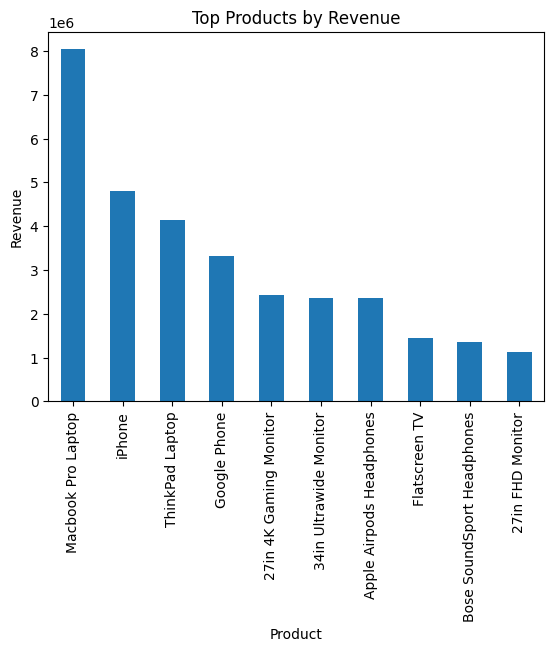

In [17]:
import matplotlib.pyplot as plt
product_sales = df.groupby("Product")["turnover"].sum().sort_values(ascending=False)
product_sales
product_sales.head(10).plot(kind="bar")
plt.title("Top Products by Revenue")
plt.ylabel("Revenue")
plt.show()



The iPhone generates the highest revenue due to its high unit price, even though lower-priced accessories sell in higher volumes.

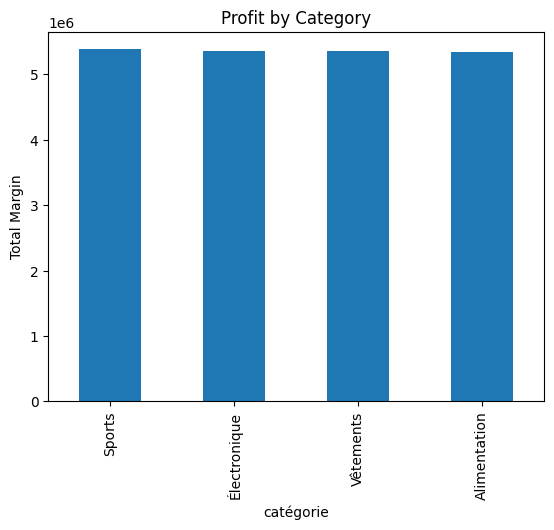

In [18]:
category_margin = df.groupby("catégorie")["margin"].sum().sort_values(ascending=False)
category_margin
category_margin.plot(kind="bar")
plt.title("Profit by Category")
plt.ylabel("Total Margin")
plt.show()



The Electronics category contributes the highest overall margin, making it the most profitable segment

In [22]:
df["City"] = df["Purchase Address"].str.split(",").str[1].str.strip()
city_sales = df.groupby("City")["turnover"].sum().sort_values(ascending=False)
city_sales



City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: turnover, dtype: float64

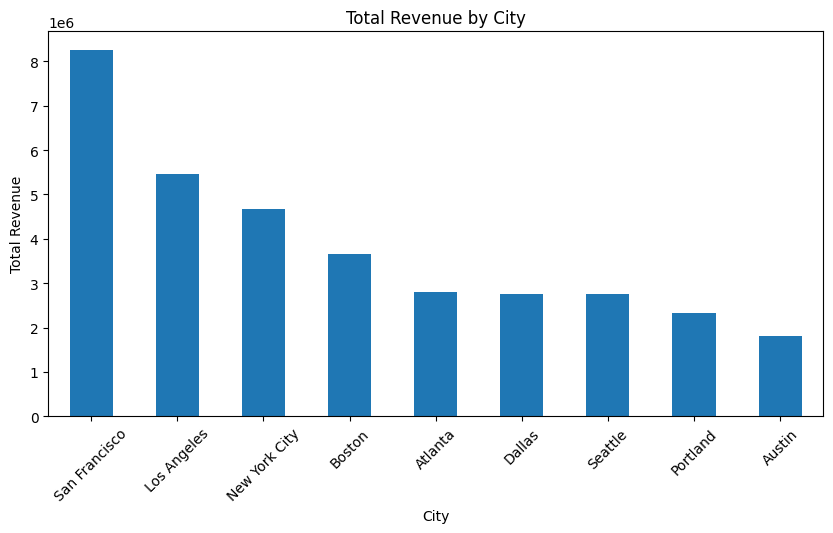

In [23]:
import matplotlib.pyplot as plt

city_sales.plot(kind="bar", figsize=(10,5))
plt.title("Total Revenue by City")
plt.ylabel("Total Revenue")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.show()


Cities such as San Francisco, Los Angeles, and Boston contribute the highest revenue. This indicates strong consumer demand in metropolitan areas. Marketing and inventory planning should prioritize high-performing cities.

In [26]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Month"] = df["Order Date"].dt.month
monthly_sales = df.groupby("Month")["turnover"].sum().sort_values()
monthly_sales



Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: turnover, dtype: float64

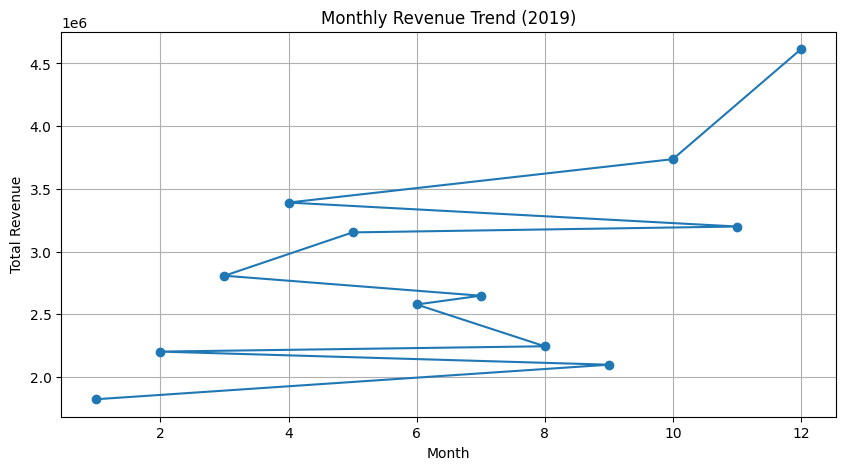

In [27]:
monthly_sales.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Monthly Revenue Trend (2019)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


Revenue increases steadily throughout the year and peaks in the last quarter, indicating strong seasonal demand during holiday periods. The company should increase inventory and marketing spend before peak months.

In [28]:
product_margin = df.groupby("Product")["margin"].sum().sort_values(ascending=False)
product_margin


Product
Macbook Pro Laptop            5.385192e+06
iPhone                        3.212181e+06
ThinkPad Laptop               2.767072e+06
Google Phone                  2.223864e+06
27in 4K Gaming Monitor        1.631515e+06
34in Ultrawide Monitor        1.578224e+06
Flatscreen TV                 9.686190e+05
Apple Airpods Headphones      8.222025e+05
Bose SoundSport Headphones    6.727827e+05
Vareebadd Phone               5.542240e+05
27in FHD Monitor              3.963486e+05
LG Washing Machine            2.677320e+05
LG Dryer                      2.596920e+05
Lightning Charging Cable      1.735471e+05
20in Monitor                  1.589520e+05
USB-C Charging Cable          1.432506e+05
Wired Headphones              1.232392e+05
AA Batteries (4-pack)         5.305920e+04
AAA Batteries (4-pack)        4.637042e+04
Name: margin, dtype: float64

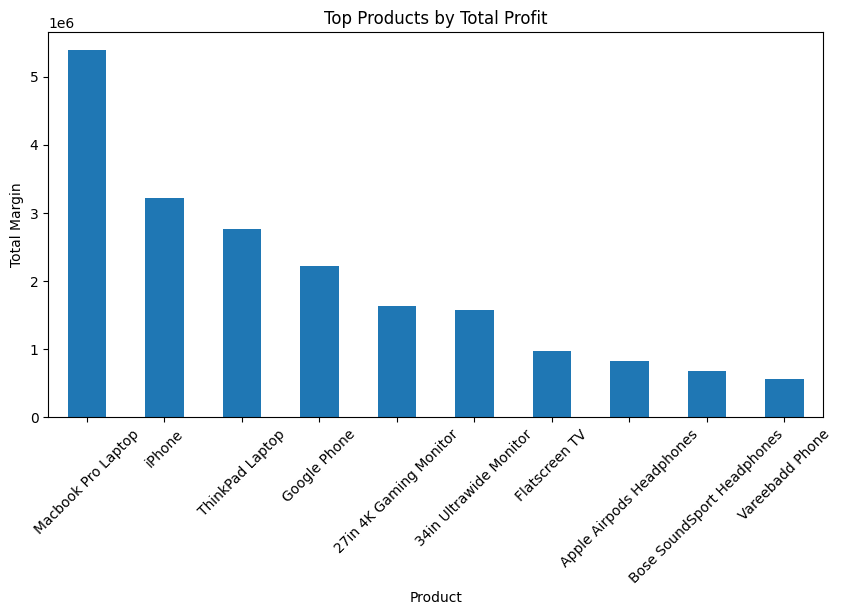

In [29]:
product_margin.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top Products by Total Profit")
plt.ylabel("Total Margin")
plt.xticks(rotation=45)
plt.show()


High-end electronic products such as iPhones and monitors contribute the highest overall profit margins. Although accessories sell in larger quantities, premium products drive the majority of profitability.

In [30]:
df["Margin_per_unit"] = df["Price Each"] - df["Cost price"]

avg_margin = df.groupby("Product")["Margin_per_unit"].mean().sort_values(ascending=False)
avg_margin.head(10)


Product
Macbook Pro Laptop        1139.0000
ThinkPad Laptop            669.9933
iPhone                     469.0000
LG Washing Machine         402.0000
LG Dryer                   402.0000
Google Phone               402.0000
Vareebadd Phone            268.0000
27in 4K Gaming Monitor     261.2933
34in Ultrawide Monitor     254.5933
Flatscreen TV              201.0000
Name: Margin_per_unit, dtype: float64

In [2]:
import pandas as pd 
df=pd.read_csv("C:/Users/aarti/OneDrive/Documents/rf-phase2-dataanalyst-aarti/Data/sales_data.csv")
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [4]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("sales.db")
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,sales


In [ ]:
df.to_sql("transactions",conn,if_exists="replace",index=False)
conn.commit()

In [6]:
pd.read_sql("select * from transactions limit 5",conn)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [7]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)


,name
0,sales
1,transactions


In [9]:
pd.read_sql("select * from 'transactions' limit 5",conn)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [15]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("sales.db")

query = """
SELECT category,
       SUM(turnover) AS total_revenue
FROM sales
GROUP BY category
ORDER BY total_revenue DESC;
"""

result = pd.read_sql(query, conn)
result


,category,total_revenue


In [7]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect("sales.db")

In [8]:
query1 = """
SELECT category,
       SUM(turnover) AS total_revenue
FROM sales
GROUP BY category
ORDER BY total_revenue DESC;
"""

df1 = pd.read_sql(query1, conn)
df1

,category,total_revenue


In [9]:
query2 = """
SELECT product,
       SUM(margin) AS total_profit
FROM sales
GROUP BY product
ORDER BY total_profit DESC
LIMIT 5;
"""

df2 = pd.read_sql(query2, conn)
df2

,product,total_profit


In [10]:
query3 = """
SELECT 
    SUBSTR(purchase_address, INSTR(purchase_address, ',') + 2) AS city,
    SUM(turnover) AS total_sales
FROM sales
GROUP BY city
ORDER BY total_sales DESC;
"""

df3 = pd.read_sql(query3, conn)
df3

,city,total_sales


In [11]:
query4 = """
SELECT product,
       SUM(turnover) AS total_revenue
FROM sales
GROUP BY product
HAVING total_revenue > (
    SELECT AVG(turnover) FROM sales
);
"""

df4 = pd.read_sql(query4, conn)
df4

,product,total_revenue


In [12]:
query5 = """
SELECT category,
       AVG(turnover) AS avg_order_value
FROM sales
GROUP BY category;
"""

df5 = pd.read_sql(query5, conn)
df5

,category,avg_order_value


In [13]:
conn.close()

Electronics category generates the highest revenue, indicating strong customer demand. Premium products contribute significantly to profit margins, suggesting focus on high-value SKUs.